In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [4]:
df = pd.read_csv('../ni/data/les5_ex1.csv')
df.head()

,x,y
0,3,238
1,112,-253
2,46,400
3,61,362
4,10,-199


In [5]:
x = df['x'].values
y = df['y'].values

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

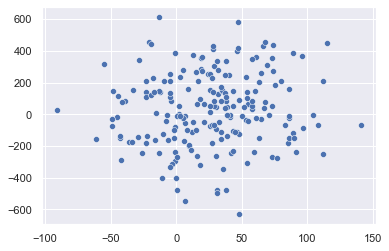

In [6]:
sns.scatterplot(x, y) # диаграмма рассеяния

<AxesSubplot:ylabel='Count'>

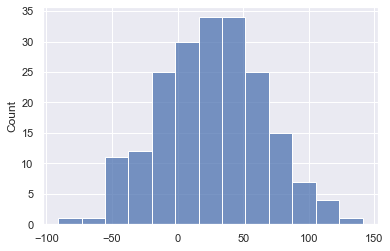

In [7]:
sns.histplot(x)

<AxesSubplot:ylabel='Count'>

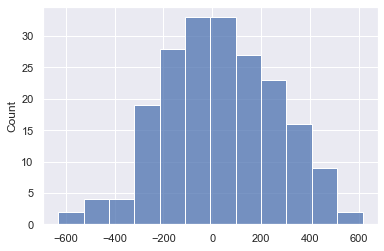

In [8]:
sns.histplot(y)

In [9]:
stats.shapiro(x)

ShapiroResult(statistic=0.9973462224006653, pvalue=0.9834932684898376)

In [10]:
stats.shapiro(y)

ShapiroResult(statistic=0.9951492547988892, pvalue=0.7716122269630432)

In [11]:
stats.pearsonr(x, y)

(0.08685460764522468, 0.22135880400512686)

In [12]:
r, _ = stats.pearsonr(x, y)
r

0.08685460764522468

In [26]:
np.corrcoef(x, y)

array([[1.        , 0.08685461],
       [0.08685461, 1.        ]])

In [18]:
n = len(x)
cov = 1 / (n - 1) * (x * y).sum() - x.mean() * y.mean()
cov / (x.std(ddof=1) * y.std(ddof=1))

0.08729443673331233

In [13]:
a, b = 10, 20
print(a)
print(b)

10
20


In [14]:
a, b = b, a
print(a, b)

20 10


In [19]:
n

200

In [20]:
T = np.sqrt(n - 2) * r / np.sqrt(1 - r**2)
T

1.226788698312703

In [23]:
p_value = 1 - stats.t.cdf(T, n - 2)
p_value

0.11067940200255644

In [24]:
p_value_two_tailed = 2 * p_value
p_value_two_tailed

0.22135880400511287

In [25]:
if p_value > 0.05:
    print('Не отвергаем H0, зависимости нет')
else: 
    print('Гипотеза H0 отвергается в пользу альтернативы H1, между СВ имеется зависимость')

Не отвергаем H0, зависимости нет


# Критерий Кендалла

In [28]:
tau, _ = stats.kendalltau(x, y)
tau

0.06070412039433993

In [29]:
t = 3 * np.sqrt(n) * tau / 2
t

1.2877288553040709

In [31]:
# P ( X < t )
stats.norm.cdf(t)
# P (X > t )
1 - stats.norm.cdf(t)

0.09892018266707425

In [32]:
# P (X < -t or X > t )
2 * (1 - stats.norm.cdf(t))

0.1978403653341485

# Критерий Спирмена

In [35]:
rho , _ = stats.spearmanr(x, y)
rho

0.09582108993114645

In [36]:
t = np.sqrt(n - 1) * rho
t

1.3517228169425042

In [37]:
# P ( X < t )
stats.norm.cdf(t)
# P (X > t )
1 - stats.norm.cdf(t)

0.08823200153383493

In [38]:
# P (X < -t or X > t )
2 * (1 - stats.norm.cdf(t))

0.17646400306766985

# Задачи

In [39]:
n = 15
# H0 : r = 0
# HA = H3 : r <> 0
x = np.array([3, 2.6, 5.1, 5.2, 14.2, 15.6, 20, 23.7, 20, 43.4, 42.4, 73.7, 78.3, 100, 95.9])
y = np.array([113, 117, 79, 68, 56, 13, 14, 33, 44, 8, 10, 7, 6, 8, 6])

In [41]:
r, _ = stats.pearsonr(x, y)
r

-0.716827990180576

In [42]:
T = np.sqrt(n - 2) * r / np.sqrt(1 - r**2)
T

-3.706790804202436

In [43]:
p_value = stats.t.cdf(T, n - 2) * 2
p_value

0.0026357030333997093

In [ ]:
# p_value < 0.05 => H3

## Про модельера и цвета

In [44]:
n = 12
# H0 : tau = 0
# HA = H2 : tau > 0
x = np.array([1, 4, 7, 2, 3, 5, 8, 12, 10, 6, 11, 9])
y = np.arange(1, n + 1)
print(x)
print(y)

[ 1  4  7  2  3  5  8 12 10  6 11  9]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [45]:
tau, _ = stats.kendalltau(x, y)
tau

0.5757575757575757

In [46]:
T = 3 * np.sqrt(n) * tau / 2 
T

2.991724122164424

In [47]:
# P (X > T)
p_value = 1 - stats.norm.cdf(T)
p_value

0.0013870341396691188

In [48]:
# p_value < 0.05 => HA

## Задача про спортсменов по росту

In [53]:
n = 13
# H0: tau = 0 => отсутствие линейной зависимости
# HA = H3 : tau != 0 => имеется линейная зависимость
alpha = 0.05
x = np.arange(1, n + 1)
y = np.array([6.94, 7.12, 7.01, 6.98, 7.24, 7.42, 7.13, 6.95, 7.34, 7.82, 7.23, 7.05, 7.15 ])

In [50]:
rho, _ = stats.spearmanr(x, y)
rho

0.4340659340659341

In [57]:
T = np.sqrt(n - 1 ) * rho
T

1.5036485032740803

In [58]:
# 2 * P( X > T )
p_value = 2 * (1 - stats.norm.cdf(T))
p_value

0.13267189529593226

In [54]:
if p_value > alpha: 
    print('H0')
else: 
    print('H1')

H0


In [59]:
# p-value - вероятность отклонения СВ от мат.ожидания ДАЛЬШЕ чем статистика
# Если статистика T < 0 => P (X < T) === ФУНКЦИЯ РАСПРЕДЕЛЕНИЯ (T) 
# Если статистика T > 0 => P (X > T) = 1 - P (X < T) === 1 - ФУНКЦИЯ РАСПРЕДЕЛЕНИЯ (T)